# Algorithme SVM

## Importation des librairies

In [34]:
import pandas as pd
import numpy as np
from pymongo import MongoClient

from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sns

## Chargement des données

In [35]:
from bdd import ConnexionMongoDB

# Connexion à la base de données
conn = ConnexionMongoDB()
# Récupération des données
data = conn.labelsWithUserData()

## Préparation des données

In [36]:
X = data.drop('label', axis=1)  # Features
y = data['label']  # Target variable

# Print features and target variables to verify
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   agressivity  1502 non-null   object
 1   avgHashtag   1502 non-null   object
 2   avgMention   1502 non-null   object
 3   avgUrls      1502 non-null   object
 4   ftweets      1502 non-null   object
 5   nbtweet      1502 non-null   object
 6   ratio        1502 non-null   object
 7   visibility   1502 non-null   object
dtypes: object(8)
memory usage: 94.0+ KB


In [37]:
X['agressivity'] = pd.to_numeric(X['agressivity'], errors='coerce')
X['avgHashtag'] = pd.to_numeric(X['avgHashtag'], errors='coerce')
X['avgMention'] = pd.to_numeric(X['avgMention'], errors='coerce')
X['avgUrls'] = pd.to_numeric(X['avgUrls'], errors='coerce')
X['ftweets'] = pd.to_numeric(X['ftweets'], errors='coerce')
X['nbtweet'] = pd.to_numeric(X['nbtweet'], errors='coerce')
X['ratio'] = pd.to_numeric(X['ratio'], errors='coerce')
X['visibility'] = pd.to_numeric(X['visibility'], errors='coerce')
X.fillna(0, inplace=True)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   agressivity  1502 non-null   float64
 1   avgHashtag   1502 non-null   float64
 2   avgMention   1502 non-null   float64
 3   avgUrls      1502 non-null   float64
 4   ftweets      1502 non-null   float64
 5   nbtweet      1502 non-null   float64
 6   ratio        1502 non-null   float64
 7   visibility   1502 non-null   float64
dtypes: float64(8)
memory usage: 94.0 KB


In [39]:
X

,agressivity,avgHashtag,avgMention,avgUrls,ftweets,nbtweet,ratio,visibility
0,0.000677,2.000000,1.000000,0.000000,0.078948,19241.0,0.171882,0.123571
1,0.000240,0.333333,0.500000,0.833333,0.084007,73705.0,1.049499,0.034167
2,0.000976,4.000000,0.000000,0.000000,-1.000000,435.0,0.186207,0.165714
3,0.004036,1.500000,1.000000,1.000000,1.412596,92.0,0.074627,0.102857
4,0.004487,2.604167,1.833333,0.458333,0.954148,614.0,0.163793,0.182530
...,...,...,...,...,...,...,...,...
1497,0.000976,2.000000,1.000000,0.000000,-1.000000,2074.0,0.206210,0.123571
1498,0.003024,1.050633,0.227848,0.063291,0.950090,91291.0,0.939153,0.052803
1499,0.000363,1.333333,0.666667,0.333333,0.127090,35559.0,0.826923,0.082381
1500,0.000865,2.400000,0.800000,0.000000,0.216198,23551.0,1.367947,0.132000


In [40]:
pd.DataFrame(y)

,label
0,-1
1,-1
2,-1
3,1
4,1
...,...
1497,-1
1498,-1
1499,-1
1500,-1


## Entraînement du modèle

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.3)  # 70% training and 30% test

svm = SVC(C=10, kernel='rbf', gamma='scale')

In [42]:

# Train the model using the training sets
svm.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = svm.predict(X_test)

## Évaluation de la précision

In [43]:
# Model Accuracy: how often is the classifier correct?
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}%")

Accuracy: 97.78270509977827%


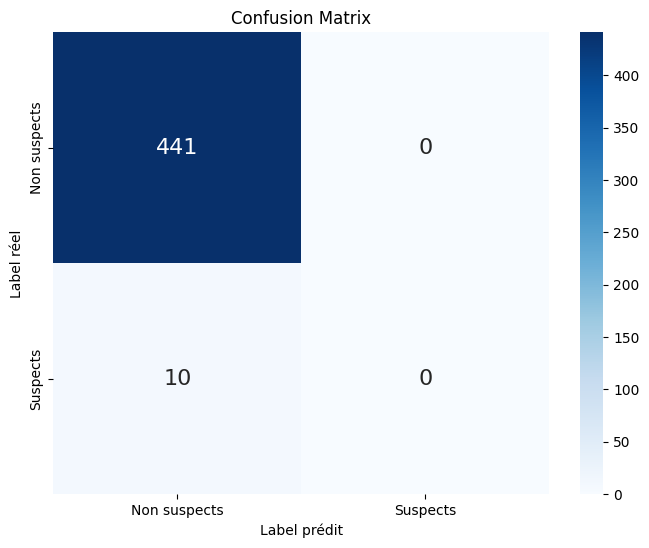

In [44]:
matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
s = sns.heatmap(matrix, annot=True, 
            fmt='d', cmap='Blues', 
            annot_kws={"size": 16}, 
            xticklabels=['Non suspects', 'Suspects'], 
            yticklabels=['Non suspects', 'Suspects'])
plt.xlabel('Label prédit')
plt.ylabel('Label réel')
plt.title('Confusion Matrix')
plt.show()